# Working with existing deployments

In [1]:
from skil import Skil, get_service_by_id, Service

from skil import get_experiment_by_id, get_model_by_id, get_workspace_by_id, get_deployment_by_id

skil_server = Skil(
    host          = '139.5.145.132',
    port          = 9008,
    user_id       = 'admin',
    password      = ''
)

Using TensorFlow backend.


'>>> Authenticating SKIL...'
'>>> Done!'


## Initial service

In [2]:
experiment_id = 'yolo-experiment-01'
model_id      = 'yolo-model-01'
deployment_id = '2'

service = get_service_by_id(
    skil_server,
    experiment_id,
    model_id,
    deployment_id
)

In [3]:
service.model_entity

{'created': None,
 'deployment_id': None,
 'extra_args': None,
 'file_location': None,
 'id': 'yolo-model-01',
 'jvm_args': None,
 'labels_file_location': None,
 'launch_policy': None,
 'model_state': None,
 'model_type': None,
 'name': None,
 'scale': None,
 'state': None,
 'sub_type': None,
 'updated': None}

In [4]:
import skil_client

In [5]:
skil_client.ModelEntity('yolo-model-01')

{'created': None,
 'deployment_id': None,
 'extra_args': None,
 'file_location': None,
 'id': 'yolo-model-01',
 'jvm_args': None,
 'labels_file_location': None,
 'launch_policy': None,
 'model_state': None,
 'model_type': None,
 'name': None,
 'scale': None,
 'state': None,
 'sub_type': None,
 'updated': None}

In [6]:
service.save('service.json')

## Run YOLO-v2 Detection Inference

In [17]:
import skil, requests, cv2, json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set configurations & temp image
threshold=0.5
needs_preprocessing=False
image_path='../images/img-5.jpg'

image = cv2.imread(image_path)

detections = service.detect_objects(image)
print(json.dumps(detections['objects'][0], indent=4))

{
    "centerX": 41.0,
    "height": 214.0,
    "confidences": [
        0.67111385,
        0.3215403,
        0.005571954,
        0.00027253383,
        0.00016913266,
        0.00014068981,
        0.00010662588,
        0.00010121627,
        5.9363334e-05,
        5.648494e-05
    ],
    "predictedClasses": [
        "truck",
        "car",
        "bus",
        "person",
        "motorbike",
        "train",
        "tvmonitor",
        "parking meter",
        "bottle",
        "cell phone"
    ],
    "predictedClassNumbers": [
        7,
        2,
        5,
        0,
        3,
        6,
        62,
        12,
        39,
        67
    ],
    "width": 90.0,
    "centerY": 239.0
}


### Save Detection

In [25]:
with open('detections/img-5.json', 'w') as outfile:  
    json.dump(detections, outfile, indent=4, sort_keys=True)

## Visualize detections

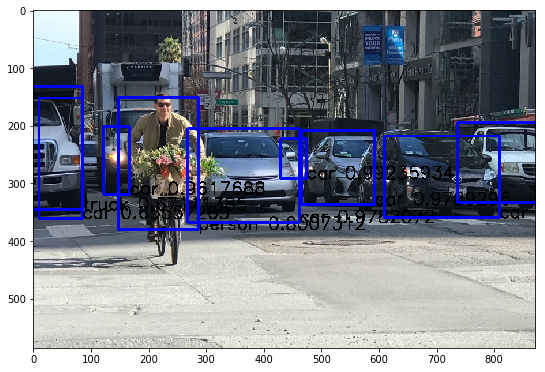

1: [truck, 0.67111]
2: [car, 0.65557]
3: [car, 0.96177]
4: [person, 0.80073]
5: [car, 0.97821]
6: [car, 0.99236]
7: [car, 0.97893]
8: [car, 0.99013]
9: [car, 0.87796]


In [25]:
new_image = skil.utils.yolo.annotate_image(image, detections)

cv2.imwrite('annotated.jpg', image)

plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
image.shape

for k, detection in enumerate(detections['objects']):
    predicted = detection['predictedClasses'][0]
    confidence = detection['confidences'][0]
    
    print('{}: [{}, {:.5}]'.format(k+1, predicted, confidence))